In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn import linear_model

In [2]:
data = pd.read_csv('data/googleplaystore.csv')
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


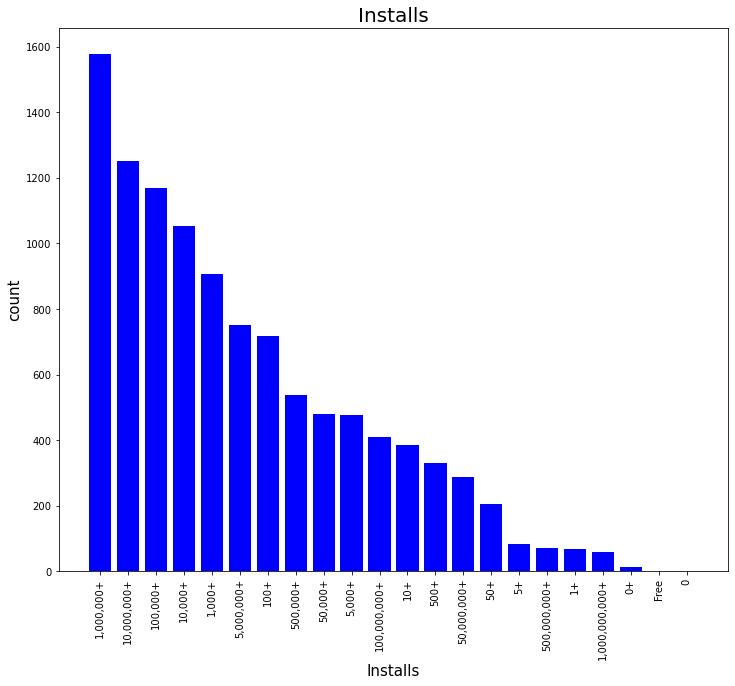

In [3]:
# EDA : Plots for exploration

#Plotting installs against how many such apps:

plt.figure(figsize = (12,10))
plt.bar(data['Installs'].value_counts().index.tolist(),data['Installs'].value_counts(), color = "blue")
plt.xticks(rotation=90)
plt.xlabel("Installs",size = 15, color = "black")
plt.ylabel("count",size = 15, color = "black")
plt.title("Installs",size = 20, color = "black")
plt.show()

Text(0.5, 1.0, 'Count of apps in each category')

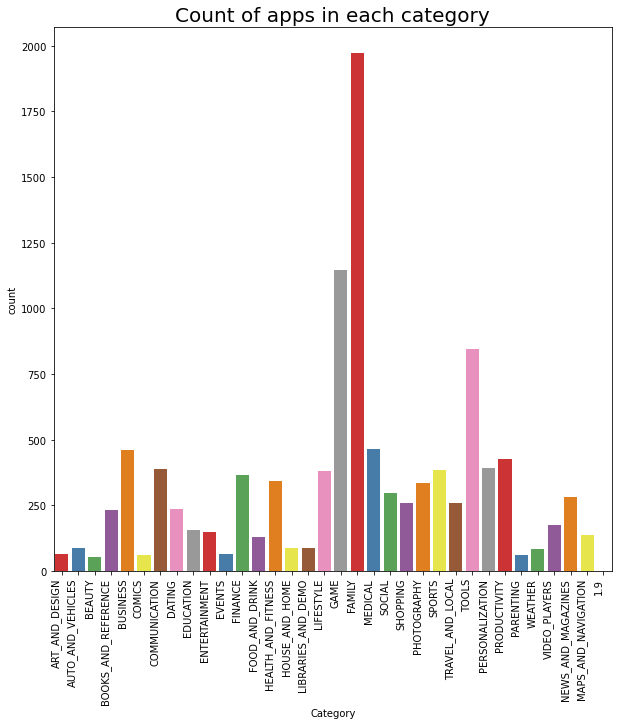

In [4]:
#Count of apps in each category

plt.figure(figsize = (10,10))
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of apps in each category',size = 20)

***Rating seems to be concentrated around 4.5***

In [5]:
#Dropping 3 attributes (Android Ver, Last Updated, Current Ver)
data = data.drop(['Android Ver','Last Updated','Current Ver'], axis=1)

In [6]:
#Drop the duplicate rows having same app names
data.drop_duplicates(subset='App', keep='first', inplace=True)

In [7]:
#remove data with 0 reviews, 0 installs or null ratings
data.dropna(subset=['Reviews', 'Rating', 'Installs','Content Rating'], inplace=True)

In [8]:
#Displaying Unique Categories of Apps
print( len(data['Category'].unique()) , "categories")

print("\n".join(data['Category'].unique()))

33 categories
ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [9]:
#Displaying Unique Genres of Apps
print( len(data['Genres'].unique()) , "allGenres")

print("\n".join(data['Genres'].unique()))

114 allGenres
Art & Design
Art & Design;Pretend Play
Art & Design;Creativity
Auto & Vehicles
Beauty
Books & Reference
Business
Comics
Comics;Creativity
Communication
Dating
Education;Education
Education
Education;Creativity
Education;Music & Video
Education;Action & Adventure
Education;Pretend Play
Education;Brain Games
Entertainment
Entertainment;Music & Video
Entertainment;Brain Games
Entertainment;Creativity
Events
Finance
Food & Drink
Health & Fitness
House & Home
Libraries & Demo
Lifestyle
Lifestyle;Pretend Play
Adventure;Action & Adventure
Arcade
Casual
Card
Casual;Pretend Play
Action
Strategy
Puzzle
Sports
Music
Word
Racing
Casual;Creativity
Casual;Action & Adventure
Simulation
Adventure
Board
Trivia
Role Playing
Simulation;Education
Action;Action & Adventure
Casual;Brain Games
Simulation;Action & Adventure
Educational;Creativity
Puzzle;Brain Games
Educational;Education
Educational;Brain Games
Educational;Pretend Play
Entertainment;Education
Casual;Education
Music;Music & Video


In [10]:
#Only having one of the genres. Hence removing the genres that are followed after ;
data['Genres'] = [i.split(';')[0] for i in data['Genres']]

In [11]:
# Remove the + from Installs and make it purely a number
data['Installs'] = [i[:-1].replace(',','') for i in data['Installs']]
data = data[data['Installs'] != '']
data['Installs'] = [int(i) for i in data['Installs']]

In [12]:
#Convert Kb to Mb and remove the text and convert the column to float
for i,row in data.iterrows():
    if 'M' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)*1000
    elif 'k' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)
    else:
        y = 0
    data.at[i, 'Size'] = y
data['Size'] = data['Size'].astype(float)

In [13]:
#verify whether the above snippet of code worked
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   float64
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [14]:
#Drop Null Values from Size
data.dropna(subset=['Size'], inplace=True)

### Integer encoding for category variable

In [15]:
# Converting Category categorical values into numerical values
categoryValues = data["Category"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Category_n"] = data["Category"].map(category_dict).astype(int)

In [16]:
#Resetting Index after dropping Null Values
data = data.reset_index()

### Integer encoding for content rating

In [17]:
# Converting Content Rating categorical values into numerical values
categoryValues = data["Content Rating"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Content Rating_n"] = data["Content Rating"].map(category_dict).astype(int)

In [18]:
# Visualizing the head of the dataset after performing a few cleaning steps
data.head(10)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n,Content Rating_n
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,0,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design,0,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,0,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,0,1
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design,0,0
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,0,0
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0,Everyone,Art & Design,0,0
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0,Everyone,Art & Design,0,0
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0,Everyone,Art & Design,0,0
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0,Everyone,Art & Design,0,0


In [19]:
#Remove the dollar sign from the Price and convert the column to float
for i,row in data.iterrows():
    if row['Price'] == '0':
        data.at[i,'Price'] = 0
    else:
        data.at[i,'Price'] = row['Price'][1:]
data['Price'] = data['Price'].astype(float)

In [20]:
data['Reviews'] = data['Reviews'].astype(int)

In [21]:
#Convert Type which is either Free or Paid to 0 or 1 for Linear Regression.
for i,row in data.iterrows():
    if row['Type'] == 'Free':
        data.at[i,'Type'] = 0
    else:
        data.at[i,'Type'] = 1
data['Type'] = data['Type'].astype(int)

In [22]:
#Verify whether the above snippet of code worked as expected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             8196 non-null   int64  
 1   App               8196 non-null   object 
 2   Category          8196 non-null   object 
 3   Rating            8196 non-null   float64
 4   Reviews           8196 non-null   int64  
 5   Size              8196 non-null   float64
 6   Installs          8196 non-null   int64  
 7   Type              8196 non-null   int64  
 8   Price             8196 non-null   float64
 9   Content Rating    8196 non-null   object 
 10  Genres            8196 non-null   object 
 11  Category_n        8196 non-null   int64  
 12  Content Rating_n  8196 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 832.5+ KB


In [23]:
# Dropping Content Rating column from the dataframe
data = data.drop(['Content Rating'], axis=1)

### Creating dummy variables for category

In [24]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [25]:
new_data.head()

,index,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,0,0.0,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Coloring book moana,3.9,967,14000.0,500000,0,0.0,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Sketch - Draw & Paint,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,0,0.0,Art & Design,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data.head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,0,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design,0,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,1
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Art & Design,0,0


[Text(0.5, 1.0, 'Installs by type'),
 Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Installs')]

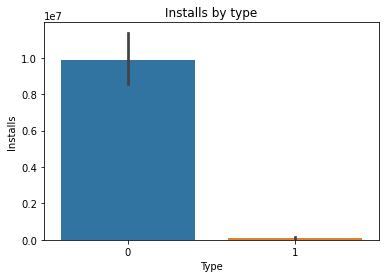

In [27]:
ax = sns.barplot(x = "Type", y= "Installs", data = data)
ax.set(title = 'Installs by type', xlabel = 'Type', ylabel = 'Installs')

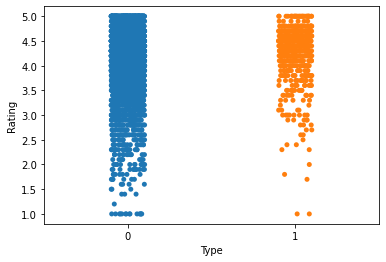

In [28]:
#Distribution of rating in free and paid apps : 

ax = sns.stripplot(x = 'Type', y = 'Rating', data = data)

In [29]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Genres'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [31]:
model = linear_model.LinearRegression().fit(X = x_train_scaled, y = y_train)

score_train = model.score(X = x_train_scaled, y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled, y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled)
print([score_train, score_val])

[0.046707756750060336, 0.04139492210501605]


In [32]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.2556233537838276
Mean absolute Error: 0.36466449289345704
Mean squared Log Error: 0.012473511803013053


In [33]:
X.head(5)

,index,Reviews,Size,Installs,Type,Price,Content Rating_n,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,0,159,19000.0,10000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,967,14000.0,500000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,87510,8700.0,5000000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,215644,25000.0,50000000,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,967,2800.0,100000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,1,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,1,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,1,2]], y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled[:,[0,1,2]])
print([score_train, score_val])

[0.01817821583734991, 0.016597540776479014]


In [35]:
data.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Art & Design,0,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Art & Design,0,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,1
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Art & Design,0,0


In [36]:
for i,row in data.iterrows():
    data.at[i,'Rating'] = round(row['Rating']*2)/2

In [37]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [38]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Size','Genres','Installs'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [40]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled,y_train)
model.score(X = x_train_scaled, y = y_train)

0.04149153996297861

In [41]:
Results = model.predict(x_test_scaled)
Results

array([4.08805477, 4.2126983 , 4.07846449, ..., 4.3344684 , 4.33523789,
       4.32174022])

In [42]:
corr_coef = np.corrcoef(Results, y_test)[1,0]
R_squared = (corr_coef)**2
print(R_squared)

0.03941507751250757


In [43]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.2968641720265117
Mean absolute Error: 0.4076689580788986
Mean squared Log Error: 0.014193258688859362


In [44]:
reviews_data = pd.read_csv('data/googleplaystore_user_reviews.csv')
reviews_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import warnings
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharatnaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             8196 non-null   int64  
 1   App               8196 non-null   object 
 2   Category          8196 non-null   object 
 3   Rating            8196 non-null   float64
 4   Reviews           8196 non-null   int64  
 5   Size              8196 non-null   float64
 6   Installs          8196 non-null   int64  
 7   Type              8196 non-null   int64  
 8   Price             8196 non-null   float64
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int64  
 11  Content Rating_n  8196 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 768.5+ KB


In [48]:
merged_data = pd.merge(data, reviews_data, how='right')
merged_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1393.0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1393.0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,1393.0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,NaN,NaN,NaN,NaN
3,1393.0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,Works great especially going grocery store,Positive,0.40,0.875000
4,1393.0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,Health & Fitness,13.0,2.0,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64290,1456.0,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.5,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64291,1456.0,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.5,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64292,1456.0,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.5,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN
64293,1456.0,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.5,353799.0,0.0,10000000.0,0.0,0.0,House & Home,14.0,0.0,NaN,NaN,NaN,NaN


## Now we will perform sentiment analysis on the merged data

In [49]:
merged_data = merged_data.dropna()
merged_data.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity','Genres'],axis=1,inplace=True)
merged_data

,index,Category,Rating,Reviews,Size,Installs,Type,Price,Category_n,Content Rating_n,Translated_Review,Sentiment
0,1393.0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,I like eat delicious food. That's I'm cooking ...,Positive
1,1393.0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,This help eating healthy exercise regular basis,Positive
3,1393.0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Works great especially going grocery store,Positive
4,1393.0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Best idea us,Positive
5,1393.0,HEALTH_AND_FITNESS,4.0,2490.0,3800.0,500000.0,0.0,0.0,13.0,2.0,Best way,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
64222,1638.0,LIFESTYLE,4.0,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,Most ads older many agents ..not much owner po...,Positive
64223,1638.0,LIFESTYLE,4.0,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,"If photos posted portal load, fit purpose. I'm...",Positive
64226,1638.0,LIFESTYLE,4.0,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,"Dumb app, I wanted post property rent give opt...",Negative
64227,1638.0,LIFESTYLE,4.0,28301.0,0.0,1000000.0,0.0,0.0,16.0,0.0,I property business got link SMS happy perform...,Positive


In [50]:
sentiment_data = merged_data[['Translated_Review','Sentiment']]
sentiment_data

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


### Converting the case of reviews to lower

In [51]:

sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].str.lower()
sentiment_data

,Translated_Review,Sentiment
0,i like eat delicious food. that's i'm cooking ...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,most ads older many agents ..not much owner po...,Positive
64223,"if photos posted portal load, fit purpose. i'm...",Positive
64226,"dumb app, i wanted post property rent give opt...",Negative
64227,i property business got link sms happy perform...,Positive


### Removing punctuation and special characters


In [52]:
import re
sentiment_data['Translated_Review'] = [re.sub(r'[^A-Za-z0-9 ]+', '', i) for i in sentiment_data['Translated_Review']]
sentiment_data.head(10)

,Translated_Review,Sentiment
0,i like eat delicious food thats im cooking foo...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
6,amazing,Positive
8,looking forward app,Neutral
9,it helpful site it help foods get,Neutral
10,good you,Positive
11,useful information the amount spelling errors ...,Positive


### Remove stop words from the reviews data

In [53]:
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x not in stopwords.words('english')))

In [54]:
sentiment_data

,Translated_Review,Sentiment
0,like eat delicious food thats im cooking food ...,Positive
1,help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,ads older many agents much owner posted detail...,Positive
64223,photos posted portal load fit purpose im sure ...,Positive
64226,dumb app wanted post property rent give option...,Negative
64227,property business got link sms happy performan...,Positive


### Remove numbers from the data

In [55]:
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x.isdigit()==False))
sentiment_data

,Translated_Review,Sentiment
0,like eat delicious food thats im cooking food ...,Positive
1,help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive
...,...,...
64222,ads older many agents much owner posted detail...,Positive
64223,photos posted portal load fit purpose im sure ...,Positive
64226,dumb app wanted post property rent give option...,Negative
64227,property business got link sms happy performan...,Positive


### Stemming every word in review text

In [56]:
st = PorterStemmer()
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x: " ".join(st.stem(word) for word in x.split()))
sentiment_data.head()

,Translated_Review,Sentiment
0,like eat delici food that im cook food case be...,Positive
1,help eat healthi exercis regular basi,Positive
3,work great especi go groceri store,Positive
4,best idea us,Positive
5,best way,Positive


In [57]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(sentiment_data['Translated_Review']).toarray()

### Splitting the data into training and test data

In [58]:
x_train,x_test,y_train,y_test = train_test_split(processed_features,sentiment_data['Sentiment'],test_size = 0.25)

### Running logistic regression model to predict the sentiment of the reviews

In [59]:
lr = linear_model.LogisticRegression()
model = lr.fit(x_train,y_train)

In [60]:
Results = model.predict(x_test)

In [61]:
model.score(x_train,y_train)

0.9308246121873376

([<matplotlib.axis.YTick at 0x7feb4eb08ee0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

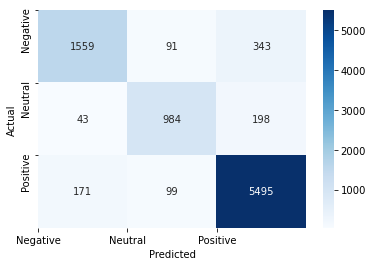

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,Results),annot=True,fmt = '.5g', cmap = plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])
plt.yticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])

In [63]:
sentiment_data['tokens'] = sentiment_data['Translated_Review'].apply(lambda x: x.split())
sentiment_data

,Translated_Review,Sentiment,tokens
0,like eat delici food that im cook food case be...,Positive,"[like, eat, delici, food, that, im, cook, food..."
1,help eat healthi exercis regular basi,Positive,"[help, eat, healthi, exercis, regular, basi]"
3,work great especi go groceri store,Positive,"[work, great, especi, go, groceri, store]"
4,best idea us,Positive,"[best, idea, us]"
5,best way,Positive,"[best, way]"
...,...,...,...
64222,ad older mani agent much owner post detail rep...,Positive,"[ad, older, mani, agent, much, owner, post, de..."
64223,photo post portal load fit purpos im sure stor...,Positive,"[photo, post, portal, load, fit, purpos, im, s..."
64226,dumb app want post properti rent give option w...,Negative,"[dumb, app, want, post, properti, rent, give, ..."
64227,properti busi got link sm happi perform still ...,Positive,"[properti, busi, got, link, sm, happi, perform..."


In [64]:
for i,row in sentiment_data.iterrows():
    if(row['Sentiment'] == 'Positive'):
        sentiment_data.at[i, 'Sentiment'] = 1
    else:
        sentiment_data.at[i, 'Sentiment'] = 0
sentiment_data

,Translated_Review,Sentiment,tokens
0,like eat delici food that im cook food case be...,1,"[like, eat, delici, food, that, im, cook, food..."
1,help eat healthi exercis regular basi,1,"[help, eat, healthi, exercis, regular, basi]"
3,work great especi go groceri store,1,"[work, great, especi, go, groceri, store]"
4,best idea us,1,"[best, idea, us]"
5,best way,1,"[best, way]"
...,...,...,...
64222,ad older mani agent much owner post detail rep...,1,"[ad, older, mani, agent, much, owner, post, de..."
64223,photo post portal load fit purpos im sure stor...,1,"[photo, post, portal, load, fit, purpos, im, s..."
64226,dumb app want post properti rent give option w...,0,"[dumb, app, want, post, properti, rent, give, ..."
64227,properti busi got link sm happi perform still ...,1,"[properti, busi, got, link, sm, happi, perform..."


### Building a wordcloud to show of positive words in the reviews

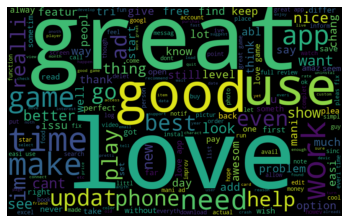

In [65]:
from wordcloud import WordCloud
list_words_positive = []
for index, row in sentiment_data.iterrows():
    if row['Sentiment'] == 1:
        list_words_positive.extend(row['tokens'])
all_words = ' '.join(list_words_positive)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Building a wordcloud to show of negative words in the reviews

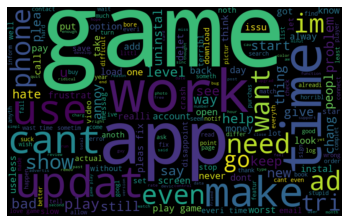

In [66]:
list_words_negative = []
for index, row in sentiment_data.iterrows():
    if row['Sentiment'] == 0:
        list_words_negative.extend(row['tokens'])
all_words = ' '.join(list_words_negative)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()